<a href="https://colab.research.google.com/github/mariamatef847/Sentiment-Analysis-on-IMDB-Reviews/blob/main/Top_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving IMDB Dataset.csv to IMDB Dataset.csv


In [2]:
import pandas as pd
df = pd.read_csv('/content/IMDB Dataset.csv')

In [4]:
df=df.sample(500,random_state=42)

In [5]:
df

,review,sentiment
33553,I really liked this Summerslam due to the look...,positive
9427,Not many television shows appeal to quite as m...,positive
199,The film quickly gets to a major chase scene w...,negative
12447,Jane Austen would definitely approve of this o...,positive
39489,Expectations were somewhat high for me when I ...,negative
...,...,...
314,"I was looking forward to this so much, being a...",negative
11449,If there's anything worse than this movie I do...,negative
30745,"I'm serious as well, I mean don't get me wrong...",positive
29702,A fantastic show and an unrealized classic; Th...,positive


In [6]:
import re
import nltk

In [8]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [9]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [10]:
stopwords_set=set(stopwords.words('english'))

In [11]:
stopwords_set

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [12]:
def clean_txt(text):
  text=text.lower()
  text=re.sub(r'[^a-z\s]',' ',text)
  tokens=word_tokenize(text)
  tokens=[i for i in tokens if i not in stopwords_set]
  return ' '.join(tokens)

In [13]:
df['cleaned_review']=df['review'].apply(clean_txt)

In [14]:
from textblob import TextBlob

In [15]:
def sentiment(text):
  p=TextBlob(text).sentiment.polarity
  if p>0:
    return 'Positive'
  elif p<0:
    return 'Negative'
  else:
    return 'Negative'


In [16]:
df['Sentiment_analysis']=df['cleaned_review'].apply(sentiment)

In [17]:
df

,review,sentiment,cleaned_review,Sentiment_analysis
33553,I really liked this Summerslam due to the look...,positive,really liked summerslam due look arena curtain...,Negative
9427,Not many television shows appeal to quite as m...,positive,many television shows appeal quite many differ...,Positive
199,The film quickly gets to a major chase scene w...,negative,film quickly gets major chase scene ever incre...,Positive
12447,Jane Austen would definitely approve of this o...,positive,jane austen would definitely approve one br br...,Positive
39489,Expectations were somewhat high for me when I ...,negative,expectations somewhat high went see movie thou...,Negative
...,...,...,...,...
314,"I was looking forward to this so much, being a...",negative,looking forward much big fan book however came...,Positive
11449,If there's anything worse than this movie I do...,negative,anything worse movie want see remember many am...,Positive
30745,"I'm serious as well, I mean don't get me wrong...",positive,serious well mean get wrong got bent type z gr...,Positive
29702,A fantastic show and an unrealized classic; Th...,positive,fantastic show unrealized classic league gentl...,Positive


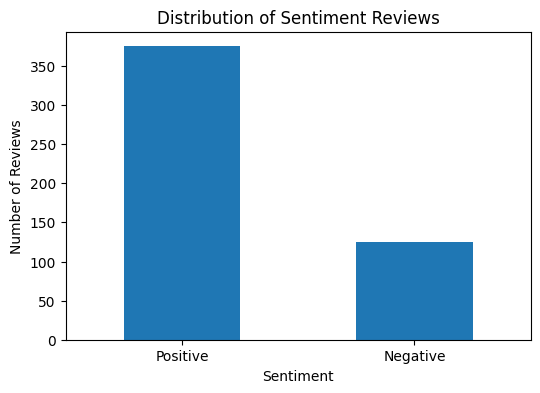

In [18]:
import matplotlib.pyplot as plt
sent_counts = df['Sentiment_analysis'].value_counts()

plt.figure(figsize=(6,4))
sent_counts.plot(kind='bar')

plt.title("Distribution of Sentiment Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.show()